In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [4]:
#Generate Dataset

X,Y = make_regression(n_samples=400,n_features=1,n_informative=1,noise=1.8,random_state=11)

Y = Y.reshape(-1,1)
print(X.shape)
print(Y.shape)

(400, 1)
(400, 1)


In [12]:
#Normalise the dataset
X = (X - X.mean())/X.std()

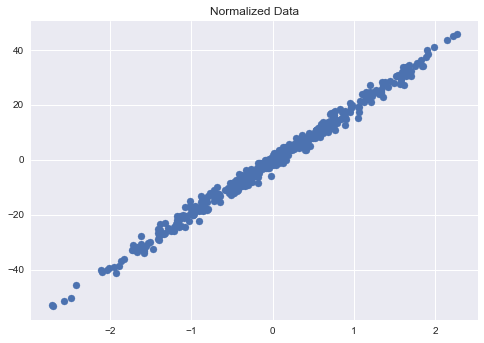

In [13]:
#Visualize
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.title('Normalized Data')
plt.show()

- Loss Function : (XQ - Y)**2 == (XQ - Y)'.(XQ - Y)
- X is m * n (n=1) Q is [Q1 Q0], 2 * 1, therefore add a column of 1's in X so that their dot product gives us m * 1 (Y_predicted)    

In [14]:
ones = np.ones((X.shape[0],1))
X_ = np.hstack((X,ones))

In [15]:
print(X_.shape)

(400, 2)


In [16]:
print(X_[:5,:])

[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [41]:
def predict(X,theta):
    return np.dot(X,theta)

def getThetaClosedForm(X,Y):
    Y = np.mat(Y)
    firstPart = np.dot(X.T,X)
    secondPart = np.dot(X.T,Y)
    
    theta = np.linalg.pinv(firstPart)*secondPart
    
    return theta

'*" do element wise multiplication in case both operators are numpy.ndarray.

But here, we used

   Y = np.mat(Y)
So by this we converted secondPart to <class ‘numpy.matrix’> and now * will perform dot product only.

If you decide not to use this line, you have to use np.dot().

In [42]:
theta = getThetaClosedForm(X_,Y)
theta

matrix([[19.45877082],
        [-0.29187892]])

In [45]:
pred = predict(X_,theta)

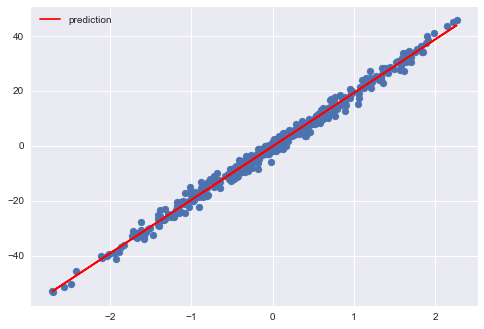

In [47]:
plt.scatter(X,Y)
plt.plot(X,pred,color='red',label='prediction')
plt.legend()
plt.show()

Line fits the data very well

In [31]:
firstPart = np.dot(X_.T,X_)
firstPart

array([[4.00000000e+02, 1.17683641e-14],
       [1.17683641e-14, 4.00000000e+02]])

In [32]:
secondPart = np.dot(X_.T,Y)
secondPart    

array([[7783.5083276 ],
       [-116.75156928]])

In [33]:
a = np.linalg.pinv(firstPart)
a

array([[ 2.50000000e-03,  7.35522754e-20],
       [-7.35522754e-20,  2.50000000e-03]])

In [34]:
a*secondPart

array([[ 1.94587708e+01,  5.72494748e-16],
       [ 8.58734358e-18, -2.91878923e-01]])

In [35]:
np.dot(a,secondPart)

array([[19.45877082],
       [-0.29187892]])